# Importação das bibliotecas básicas 

In [1]:
import pandas as pd # Carregamento de arquivos
import numpy as np # 
import seaborn as sns # Visualização de gráficos
import matplotlib.pyplot as plt # Visualização de gráficos
import plotly.express as px # Visualização de gráfico dinamicos

# Base de dados

https://www.kaggle.com/kamilpytlak/personal-key-indicators-of-heart-disease

# Exploração de dados

In [2]:
base_heart_disease = pd.read_csv('./HeartDieseaseData.csv')

In [3]:
base_heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [6]:
base_heart_disease.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
columnHeartDisease = base_heart_disease['HeartDisease']

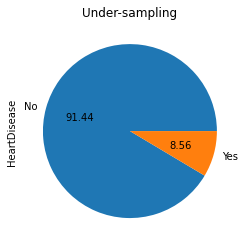

In [10]:
graphic = columnHeartDisease.value_counts().plot.pie(autopct='%.2f')
_ = graphic.set_title("Under-sampling")

Nessa base de dados, é possível ver que existe muito dados onde doenças cardíacas não estão presente, com isso, é necessário fazer um equilíbrio de dados para que a nossa ML não tenha um vícios.

Nesse sentido, o que vamos fazer é retirar o excesso de dados negativos, para podermos equilibrar nossa base de dados.

In [14]:
!pip install imblearn
!pip install yellowbrick

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [15]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [17]:
x = base_heart_disease.drop(['HeartDisease'], axis=1)
y = base_heart_disease['HeartDisease']

In [21]:
rus = RandomUnderSampler(sampling_strategy=1)
x_heart_disease, y_heart_disease = rus.fit_resample(x, y)

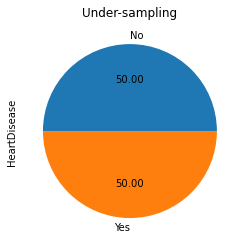

In [23]:
balancedChart = y_heart_disease.value_counts().plot.pie(autopct='%.2f')
_ = balancedChart.set_title("Under-sampling")

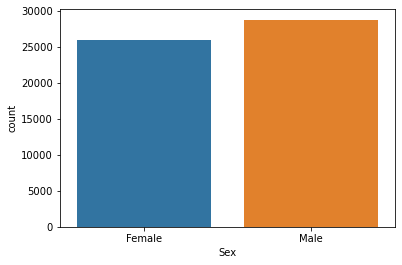

In [26]:
sns.countplot(x = x_heart_disease['Sex']);